# Data Exploration

        Date   Door TO Door  GARDEN/Biomass  PRIVATE Vehicle    TOTAL  \
0  01-02-2021       552.300          55.200            6.600  614.100   
1  02-02-2021       543.375          52.270           13.055  608.700   
2  03-02-2021       526.965          53.205           10.780  590.950   
3  04-02-2021       532.745          53.550           16.580  602.875   
4  05-02-2021       534.260          58.375            7.675  600.310   

   DEBRIS C&D Waste         Day  
0             29.245     Monday  
1             28.920    Tuesday  
2             31.100  Wednesday  
3             34.815   Thursday  
4             28.845     Friday  
501.555
501.555
       Door TO Door  GARDEN/Biomass  PRIVATE Vehicle       TOTAL  \
count    181.000000      181.000000       181.000000  181.000000   
mean     552.260110       57.675387         9.427901  619.257790   
std       21.774843        4.295787         5.738178   25.544795   
min      501.555000       44.815000         0.000000  562.025000   
2

<AxesSubplot:xlabel='Day', ylabel='Door TO Door'>

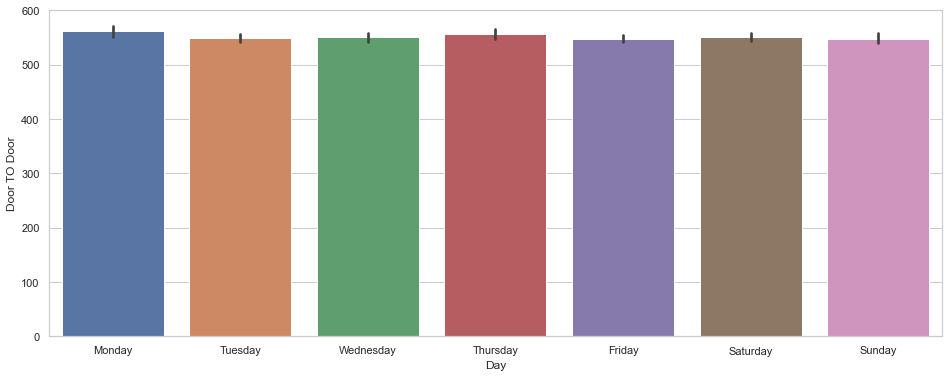

In [4]:
import pandas as pd
from pandas import Series as s
import seaborn as sns
import datetime
import numpy as np
from matplotlib import pyplot as plt

dailycollection = pd.read_csv("Data/MSWMonthWiseCollectioncsv.csv")
#df = pd.read_csv(file, parse_dates=['T'], index_col=['T'])

print(dailycollection.head())

#Rename column names with extra spaces
dailycollection.rename(columns = {"Date ":"Collection Date", "DEBRIS C&D Waste ":"DEBRIS C&D Waste"}, inplace = True)

#Converting to format of Date required by Series 'YYYY-mm-dd'
dailycollection["Collection Date"] =   pd.to_datetime(dailycollection["Collection Date"], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

#Adding new column Day_Index for computations
dailycollection['Day_Index'] = pd.to_datetime(dailycollection['Collection Date']).dt.dayofweek
print(min(dailycollection['Door TO Door']))
print(min(dailycollection['Door TO Door']))
print(dailycollection.describe())


print(dailycollection.tail())

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 6))

sns.barplot(x="Day", y = "Door TO Door", data = dailycollection )



<AxesSubplot:xlabel='Day', ylabel='Door TO Door'>

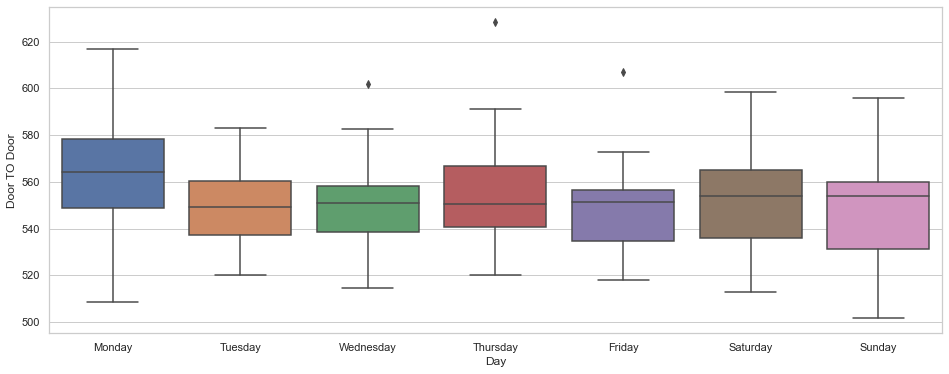

In [5]:
plt.figure(figsize=(16, 6))

sns.boxplot(x = dailycollection['Day'], y =  dailycollection['Door TO Door'])

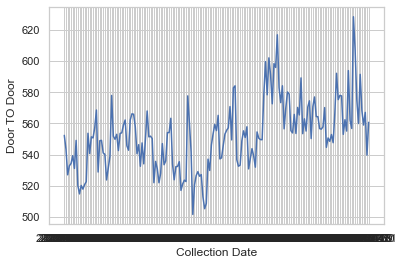

In [6]:
sns.lineplot(data=dailycollection, x="Collection Date", y="Door TO Door")
diff_dailycollection = dailycollection["Door TO Door"].diff()
# sns.lineplot(data=dailycollection, x="Collection Date", y=diff_dailycollection)
SPLIT_DATE = '01-03-2021'
# dailycollection.reset_index().set_index("Collection Date")
# split_daily = dailycollection.loc[dailycollection["Collection Date"]== SPLIT_DATE].index[0]
# print(split_daily)

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dailycollection["Door TO Door"])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

#AFTER DIFFERENCING

data_Xsform = dailycollection['Door TO Door'].diff().dropna()
result =  adfuller((data_Xsform))

print("After")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.699713
p-value: 0.074088
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
After
ADF Statistic: -6.517947
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576



Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

ADF Statistic is -2.69  is > p-value @ 1% and p-value = 0.074 is > 0.05 so we failed to reject the null hypothesis (non stationary).
This means that the process has unit root which implies that it has time dependent structure and time series is non stationary.

After differencing
Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

ADF Statistic is -6.52  is < p-value @ 1% and p-value = 0.000 is < 0.05 so we failed to reject the null hypothesis (non stationary).
This means that the process doesn't have unit root which implies that it has time dependent structure and time series is  stationary.

# Time Series Data Analysis of Garbage Collection Data

In [8]:
dailycollection_idx = dailycollection[:]

print(min(dailycollection_idx["Collection Date"]))
print(max(dailycollection_idx['Collection Date']))

#Sorting by date
dailycollection_idx = dailycollection_idx.sort_values('Collection Date')
dailycollection_idx['Collection Date'] = pd.to_datetime(dailycollection_idx['Collection Date'])



2021-02-01
2021-07-31


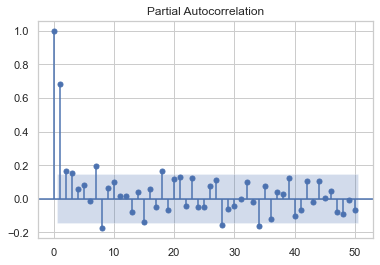

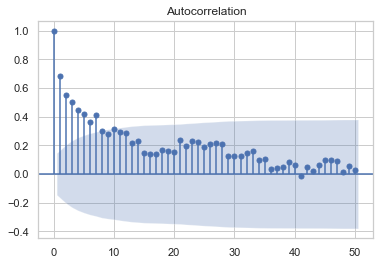

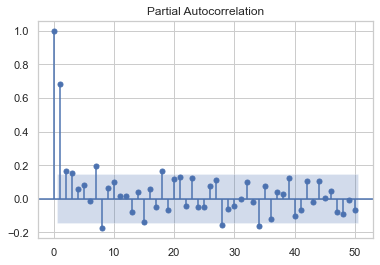

In [9]:
# # Creating Autocorrelation plot
from pandas.plotting import autocorrelation_plot

# autocorrelation_plot(dailycollection_idx['Door TO Door'])

plt.show()

from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dailycollection_idx['Door TO Door'], lags = 50)

plot_pacf(dailycollection_idx['Door TO Door'], lags = 50)
#plot_pacf(dailycollection_idx['Door TO Door'], lags = 80)

In [10]:
# data_Xsform = dailycollection [['Collection Date','Door TO Door']]
# data_Xsform[['Door TO Door']] = dailycollection['Door TO Door'].diff().dropna()
# print(data_Xsform.drop(0))
# plot_acf(data_Xsform['Door TO Door'], lags = 50)
#
# plot_pacf(data_Xsform['Door TO Door'], lags = 50)


In [11]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Collection Date
2021-02-01    552.300
2021-02-02    543.375
2021-02-03    526.965
2021-02-04    532.745
2021-02-05    534.260
               ...   
2021-07-27    568.220
2021-07-28    558.925
2021-07-29    567.030
2021-07-30    539.635
2021-07-31    560.670
Freq: D, Name: Door TO Door, Length: 181, dtype: float64


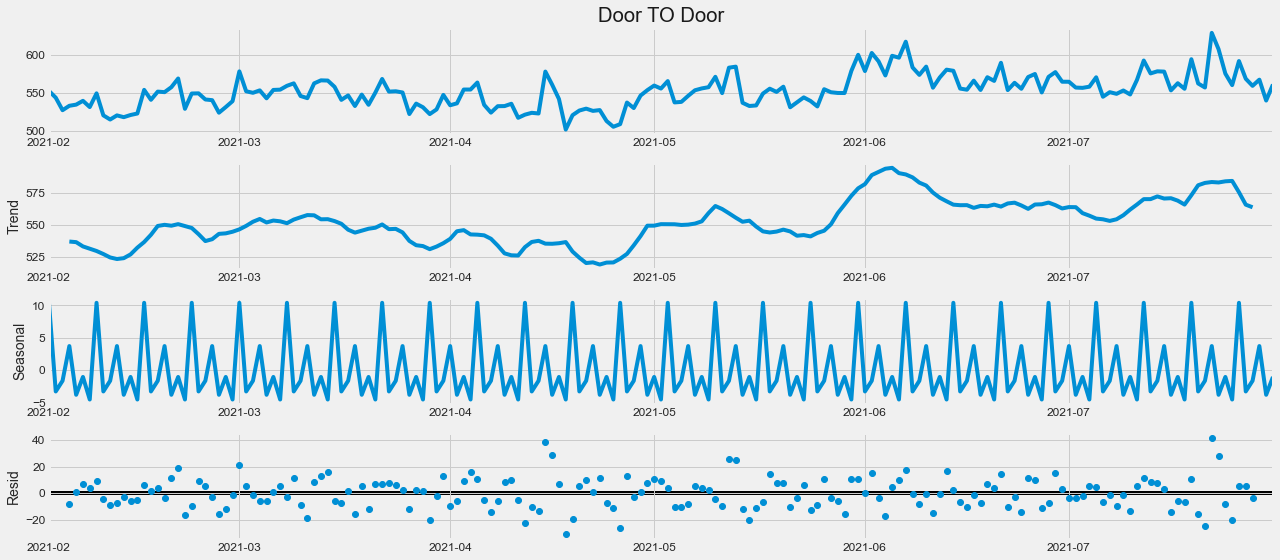

In [12]:
from pylab import rcParams

#Resample using the average of daily garbage collection. However in this case the daily average would be same because it is one record .
daily_resampled = dailycollection_idx.reset_index().set_index("Collection Date").resample('D')['Door TO Door'].sum()
print(daily_resampled)

#Seasonality Patterns
rcParams['figure.figsize'] = [18,8]

# Seasonal Decomposition by Moving Averages
decomposition = sm.tsa.seasonal_decompose(daily_resampled, model='additive')
fig = decomposition.plot()
plt.show()



In [13]:
#p = Seasonality , d = Trend and q = Noise
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [14]:
aic_result = []
param_min_aci = {}

for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('5 Months Sample ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print("AIC: {} Param: {}", min(aic_result), param_min_aci[min(aic_result)])


5 Months Sample ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:2786.1442350246525
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:2469.11300281729
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:2202.6242239433614
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:1586.1628829089434
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:1475.016580249313
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 2, 7) - AIC:1411.425407198226
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 0, 7) - AIC:1691.1028933040043
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 1, 7) - AIC:1478.235304397087
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 2, 7) - AIC:1372.899928819088
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:1596.2336483459544
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:1524.037834702237
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:1464.623468040795
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:1506.8792715151749
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:1476.3076874150254
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 2, 7

In [15]:
# print(comb[min(aic_result)])

In [16]:
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                      Door TO Door   No. Observations:                  181
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 7)   Log Likelihood                -662.002
Date:                           Sun, 05 Dec 2021   AIC                           1342.004
Time:                                   15:39:33   BIC                           1368.979
Sample:                               02-01-2021   HQIC                          1352.964
                                    - 07-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8035      0.402      1.997      0.046       0.015       1.592
ar.L2         -0.1876      0.194     -0.968

                                     SARIMAX Results                                     
Dep. Variable:                      Door TO Door   No. Observations:                  181
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -678.151
Date:                           Sun, 05 Dec 2021   AIC                           1364.303
Time:                                   15:39:33   BIC                           1376.702
Sample:                               02-01-2021   HQIC                          1369.337
                                    - 07-31-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5471      0.117      4.691      0.000       0.319       0.776
ma.L1         -0.9130      0.054    -17.013

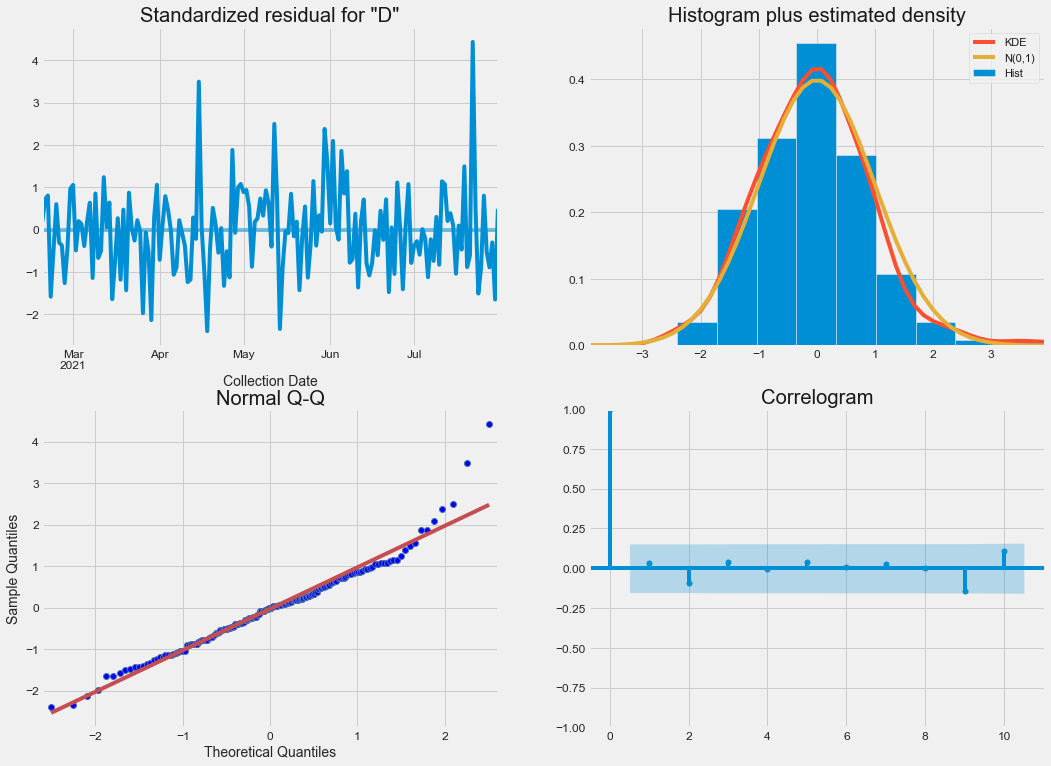

In [17]:
#ARIMA(1, 1, 1)x(0, 1, 1, 7) - AIC:1364.30281597766  Door to Door
#ARIMA(0, 1, 2)x(0, 2, 2, 7) - AIC:1279.9709106559706



#Fit the model for the least value for optimal option
mod = sm.tsa.statespace.SARIMAX(daily_resampled,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())
results.plot_diagnostics(figsize=(16, 12))
plt.show()

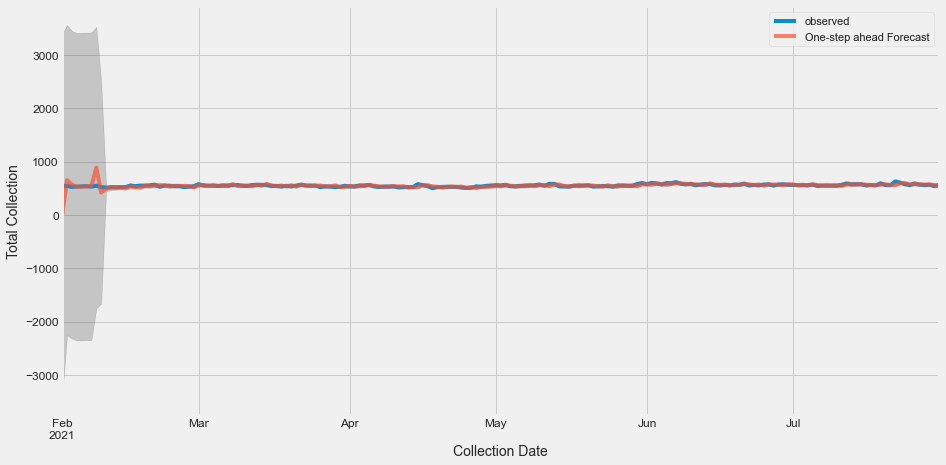

In [18]:
pred = results.get_prediction(start=pd.to_datetime(daily_resampled.index[0]), dynamic=False)
pred_ci = pred.conf_int()

ax = daily_resampled['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Collection Date')
ax.set_ylabel('Total Collection')
plt.legend()

plt.show()

                 lower Door TO Door  upper Door TO Door
Collection Date                                        
2021-02-01             -3394.757202         3394.757202
2021-02-02             -2253.902341         3559.944983
2021-02-03             -2317.118040         3448.660460
2021-02-04             -2353.566590         3409.173354
2021-02-05             -2346.616719         3415.928535
...                             ...                 ...
2021-07-27               547.383020          604.685047
2021-07-28               543.339652          600.637511
2021-07-29               542.857690          600.152079
2021-07-30               535.167461          592.458962
2021-07-31               524.899947          582.189044

[181 rows x 2 columns]


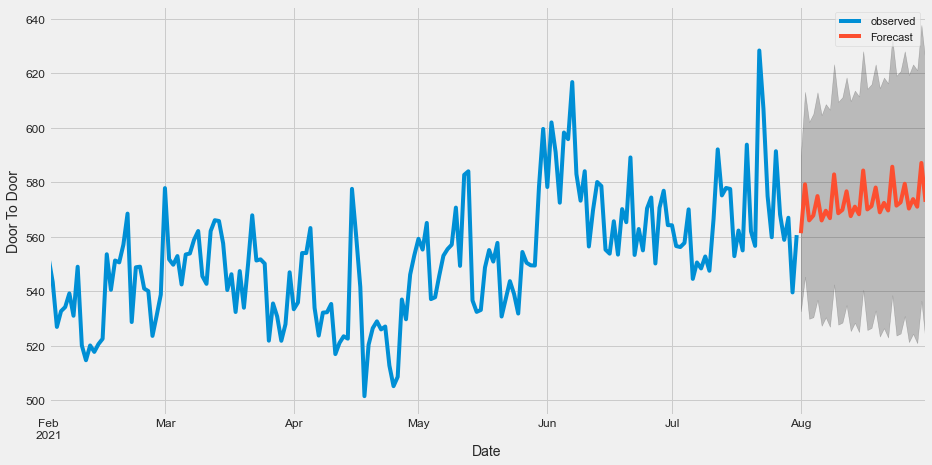

In [19]:
pred_uc = results.get_forecast(steps=31)

print(pred_ci)
pred_ci = pred_uc.conf_int()

ax = daily_resampled.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Door To Door')

plt.legend()
plt.show()

# Validation of the model using 5:1 partition of train set and test set


In [20]:
idx = dailycollection_idx.loc[dailycollection_idx["Collection Date"] == '2021-06-30'].index[0]+1
dailycollection_train = daily_resampled[:idx]
dailycollection_test = daily_resampled[idx:]
aic_result = []
param_min_aci = {}

for param in pdq:
    count = 0
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_result.append(results.aic)
            param_min_aci.update({results.aic:(param, param_seasonal)})
            print('5 Months Sample ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except RuntimeError:
            print("Error")
            continue
print("AIC: {} Param: {}", min(aic_result), param_min_aci[min(aic_result)])

5 Months Sample ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:2304.9774927739227
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:2029.4724386907408
5 Months Sample ARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:1796.3002816535286
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:1296.0985133112968
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:1202.9890155819464
5 Months Sample ARIMA(0, 0, 0)x(0, 1, 2, 7) - AIC:1138.4254544634327
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 0, 7) - AIC:1371.87057519771
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 1, 7) - AIC:1186.6783718601155
5 Months Sample ARIMA(0, 0, 0)x(0, 2, 2, 7) - AIC:1098.1433253170553
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:1305.9877846279726
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:1258.2500765091777
5 Months Sample ARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:1195.8429898313675
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:1227.0751281273886
5 Months Sample ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:1204.366001762282
5 Months Sample ARIMA(0, 0, 0)x(1, 1,

In [21]:
mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                 order=(0,1,2),
                                 seasonal_order=(0,2,2,7),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
pred = results.get_prediction(start=pd.to_datetime(dailycollection['Collection Date'][0]), dynamic=False)
pred_ci = pred.conf_int()


In [22]:
y_forecasted_dtd = results.get_forecast(steps = 31).predicted_mean
# pred.predicted_mean
y_truth = daily_resampled[dailycollection['Collection Date'][0]:]
y_truth =  dailycollection_test
mse_door_to_door = ((y_forecasted_dtd - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_door_to_door, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_door_to_door), 2)))
mse_door_to_door = round(mse_door_to_door, 2)
dtd = {"mse":mse_door_to_door, "forecast": y_forecasted_dtd}
%store dtd


The Mean Squared Error of our forecasts is 293.88
The Root Mean Squared Error of our forecasts is 17.14
Stored 'dtd' (dict)


                 lower Door TO Door  upper Door TO Door
Collection Date                                        
2021-02-01             -3919.927969         3919.927969
2021-02-02             -2842.549574         3947.149574
2021-02-03             -2851.484234         3938.234551
2021-02-04             -2867.900438         3921.831123
2021-02-05             -2862.120621         3927.610940
...                             ...                 ...
2021-06-26               544.544013          606.940892
2021-06-27               541.462372          603.854870
2021-06-28               536.701525          599.090810
2021-06-29               523.465092          585.847518
2021-06-30               547.075532          609.432726

[150 rows x 2 columns]


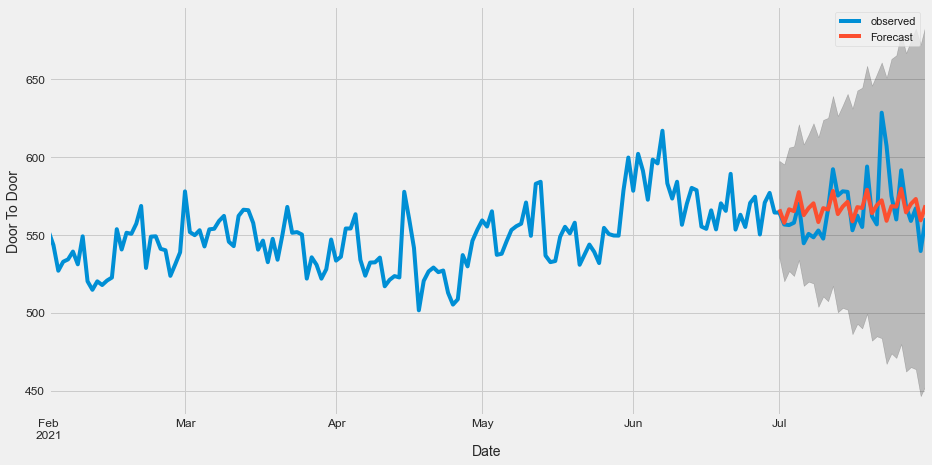

In [23]:
pred_uc = results.get_forecast(steps=31)

print(pred_ci)
pred_ci = pred_uc.conf_int()

ax = daily_resampled.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Door To Door')

plt.legend()
plt.show()

# Diagnostics
Null Hypothesis - Residuals are white noise that is independent and identically distributed
Alternate Hypothesis - Residuals are non stationary and have significant correlation in the subsequent lags
That is to validate the autocorrelation will decay to zero or not.

      lb_stat     lb_pvalue
1    0.123640  7.251196e-01
2    0.245600  8.844405e-01
3    0.247865  9.695156e-01
4    0.249563  9.928331e-01
5    0.358210  9.964029e-01
6    0.443421  9.984604e-01
7   59.034118  2.352705e-10
8   59.400769  6.109098e-10
9   59.410502  1.741207e-09
10  59.410968  4.683855e-09


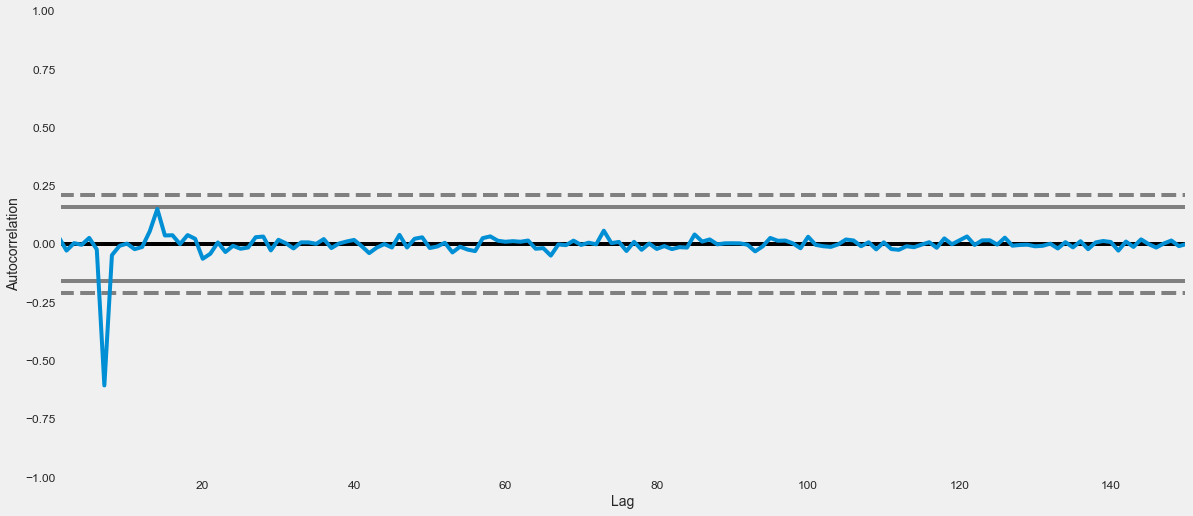

<AxesSubplot:ylabel='lb_stat'>

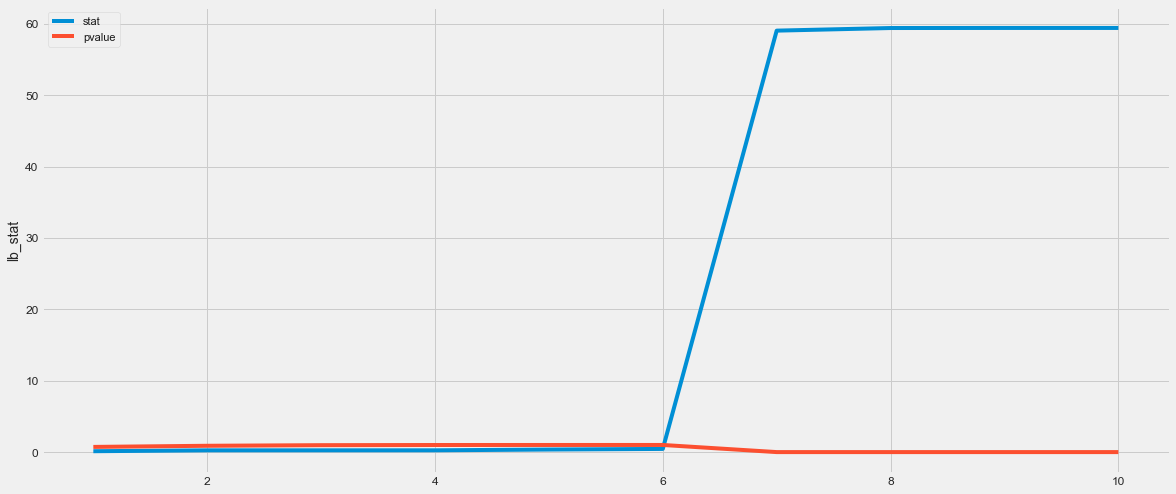

In [24]:
import statsmodels.api as sm
residual = results.resid
diagnostics = sm.stats.acorr_ljungbox(residual, lags=10, return_df= True)
print(diagnostics)
autocorrelation_plot(residual)
plt.show()
sns.lineplot(data = diagnostics["lb_stat"] , palette = 'green' , label ='stat')
sns.lineplot(data = diagnostics["lb_pvalue"], palette = 'green' , label ='pvalue' )


In [25]:
# residual.plot_diagnostics(figsize=(15, 12))
#
# plt.show()
# print("Ljung-box p-values:\n" + str(residual.test_serial_correlation(method='ljungbox')[0][1]))
# residual.summary()

# Validating the one month forecast by splitting to 5:1 train to test ratio

In [26]:
pred = results.get_prediction(start=pd.to_datetime(dailycollection_train.index[0]), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = dailycollection_train

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of our forecasts is 5599.75
The Root Mean Squared Error of our forecasts is 74.83


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3260      0.099     -3.277      0.001      -0.521      -0.131
ma.L2         -0.2630      0.096     -2.734      0.006      -0.452      -0.074
ma.S.L7       -2.1888    218.215     -0.010      0.992    -429.883     425.506
ma.S.L14       1.1888    259.514      0.005      0.996    -507.450     509.827
sigma2       163.2626   3.56e+04      0.005      0.996   -6.96e+04       7e+04


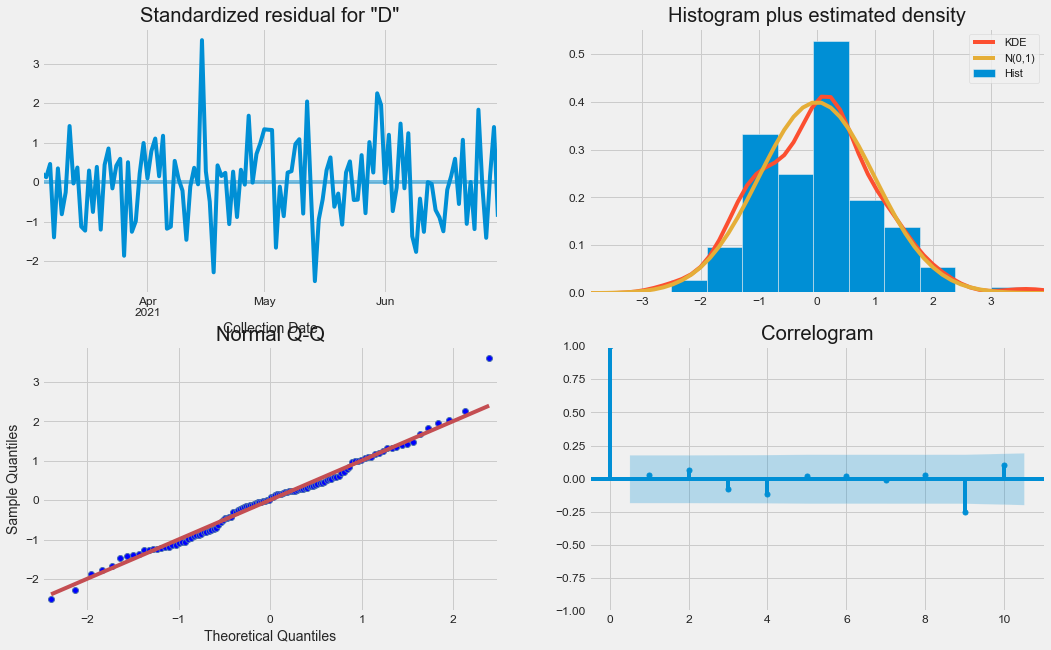

In [27]:
#5 Months Sample ARIMA(1, 1, 1)x(0, 1, 1, 7) - AIC:1101.8743907655792

mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# mod = sm.tsa.statespace.SARIMAX(dailycollection_train,
#                                 order=(1, 1, 1),
#                                 seasonal_order=(0, 1, 1, 7),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 10))
plt.show()


In [28]:
#Train Data Model Performance
pred = results.get_prediction(start=pd.to_datetime(dailycollection_train.index[0]), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = dailycollection_train
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



# Produce the forcasted tables
pm = pred_uc.predicted_mean.reset_index()
pm.columns = ['Date','Predicted_Mean']
pci = pred_ci.reset_index()
pci.columns = ['Date','Lower Bound','Upper Bound']
final_table = pm.join(pci.set_index('Date'), on='Date')


The Mean Squared Error of our forecasts is 5599.75
The Root Mean Squared Error of our forecasts is 74.83


In [29]:
#Test Data Model Performance
#
# pred = results.get_prediction(start=pd.to_datetime(dailycollection_test.index[0]), dynamic=False)
# pred_ci = pred.conf_int()
# y_forecasted = pred.predicted_mean
# y_truth = dailycollection_test
#
# mse = ((y_forecasted - y_truth) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
# print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


Collection Date
2021-07-01    564.275
2021-07-02    556.645
2021-07-03    556.285
2021-07-04    557.800
2021-07-05    570.115
2021-07-06    544.595
2021-07-07    550.615
2021-07-08    548.435
2021-07-09    552.820
2021-07-10    547.580
2021-07-11    566.645
2021-07-12    592.130
2021-07-13    575.230
2021-07-14    577.970
2021-07-15    577.600
2021-07-16    552.945
2021-07-17    562.340
2021-07-18    555.045
2021-07-19    593.860
2021-07-20    562.035
2021-07-21    556.710
2021-07-22    628.425
2021-07-23    607.015
2021-07-24    574.955
2021-07-25    559.890
2021-07-26    591.455
2021-07-27    568.220
2021-07-28    558.925
2021-07-29    567.030
2021-07-30    539.635
2021-07-31    560.670
Freq: D, Name: Door TO Door, dtype: float64


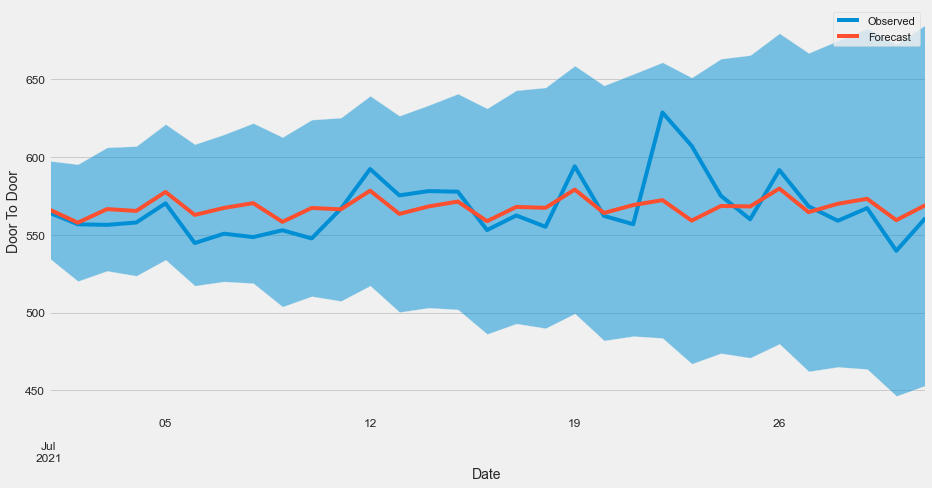

In [30]:
#Prediction Result Wrapper
print(results.data)
pred_uc = results.get_forecast(steps=len(dailycollection_test))

print(pred_uc)
#Confidence Interval
pred_ci = pred_uc.conf_int()
# print(pred_uc.predicted_mean)
print(dailycollection_test)
ax = dailycollection_test.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.50)
ax.set_xlabel('Date')
ax.set_ylabel('Door To Door')

plt.legend()
plt.show()

In [31]:
y_forecasted = pred_uc.predicted_mean
y_truth = dailycollection_test
#
mse_debris = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_debris, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_debris), 2)))
#

The Mean Squared Error of our forecasts is 293.88
The Root Mean Squared Error of our forecasts is 17.14


# Time Series Cross Validation - Rolling Forecast Origin


In [32]:
# Train Test Generator
def rolling_forecast(train, min_train_length, horizon):
    for i in range (0,len(train) - min_train_length, 5):
        split_train = train[: min_train_length+i]
        split_val = train[min_train_length+i: min_train_length + i + horizon]
        yield split_train, split_val

###
# Training Set [4 months from 1st feb'2021  to 31st May'2021]
# Validation Set [1 month from 1st Jun '2021  to 30th July'2021]
# Test Set [31 steps from 31st July'2021 to 31st Aug' 2021]
###
SPLIT_DATE = '2021-07-01'
train = daily_resampled.loc[daily_resampled.index < SPLIT_DATE]

# # for testing rolling function
# cv_rolling = rolling_forecast(train, 120, 5)
#
# i = 0
# for split_train, split_val in cv_rolling:
#     print(f'CV[{i+1}]')
#     print(f'Train length:\t{len(split_train)}')
#     print(f'Test Set:\t{split_val}')
#     i += 1



CV[1]
The Mean Squared Error of our forecasts is 578.69
The Root Mean Squared Error of our forecasts is 24.06
CV[2]
The Mean Squared Error of our forecasts is 162.87
The Root Mean Squared Error of our forecasts is 12.76
CV[3]
The Mean Squared Error of our forecasts is 312.42
The Root Mean Squared Error of our forecasts is 17.68
CV[4]
The Mean Squared Error of our forecasts is 102.66
The Root Mean Squared Error of our forecasts is 10.13
CV[5]
The Mean Squared Error of our forecasts is 174.02
The Root Mean Squared Error of our forecasts is 13.19
CV[6]
The Mean Squared Error of our forecasts is 137.02
The Root Mean Squared Error of our forecasts is 11.71
Average RMSE score for 6 folds:  14.921666666666667
Min RMSE score 6 folds:  10.13
Score Length  6
                                     SARIMAX Results                                     
Dep. Variable:                      Door TO Door   No. Observations:                  135
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likeli

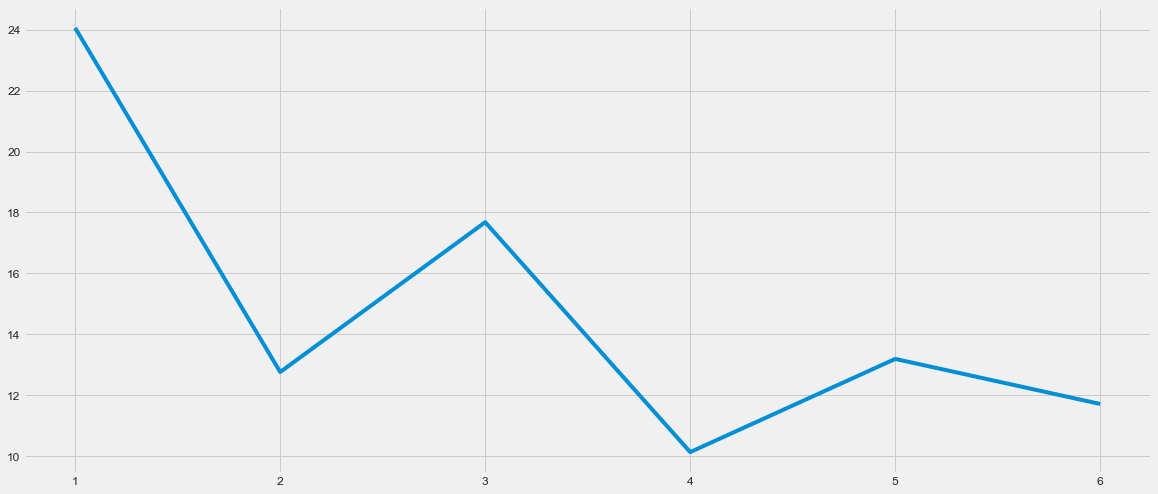

In [33]:

from numpy import mean
result_for_test = {}

def cross_validation_score (cv, order, seasonal_order):
    cv_scores = []
    i = 0
    for cv_train, cv_test in cv:
        model = sm.tsa.statespace.SARIMAX(cv_train,
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        result = model.fit()
        print(f'CV[{i+1}]')
        # print(result.summary())
        y_forecasted = result.forecast(steps = len(cv_test))
        y_truth = cv_test
        mse = ((y_forecasted - y_truth) ** 2).mean()
        rmse = round(np.sqrt(mse), 2)
        print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
        print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
        cv_scores.append(rmse)
        result_for_test.update({rmse: result })
        i += 1
    return np.array(cv_scores)

cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score (cv_rolling, order = (1,1,1),seasonal_order =(0,1,1,7))
print("Average RMSE score for 6 folds: ",mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
print("Score Length ", len(cv_scores_list))
sns.lineplot(x = [1,2,3,4,5,6], y = cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))






CV[1]
The Mean Squared Error of our forecasts is 290.97
The Root Mean Squared Error of our forecasts is 17.06
CV[2]
The Mean Squared Error of our forecasts is 499.38
The Root Mean Squared Error of our forecasts is 22.35
CV[3]
The Mean Squared Error of our forecasts is 485.88
The Root Mean Squared Error of our forecasts is 22.04
CV[4]
The Mean Squared Error of our forecasts is 161.06
The Root Mean Squared Error of our forecasts is 12.69
CV[5]
The Mean Squared Error of our forecasts is 196.49
The Root Mean Squared Error of our forecasts is 14.02
CV[6]
The Mean Squared Error of our forecasts is 241.8
The Root Mean Squared Error of our forecasts is 15.55
Average RMSE score for 6 folds:  17.285
Min RMSE score 6 folds:  12.69
                                     SARIMAX Results                                     
Dep. Variable:                      Door TO Door   No. Observations:                  135
Model:             SARIMAX(0, 1, 2)x(0, 2, 2, 7)   Log Likelihood                -441.587


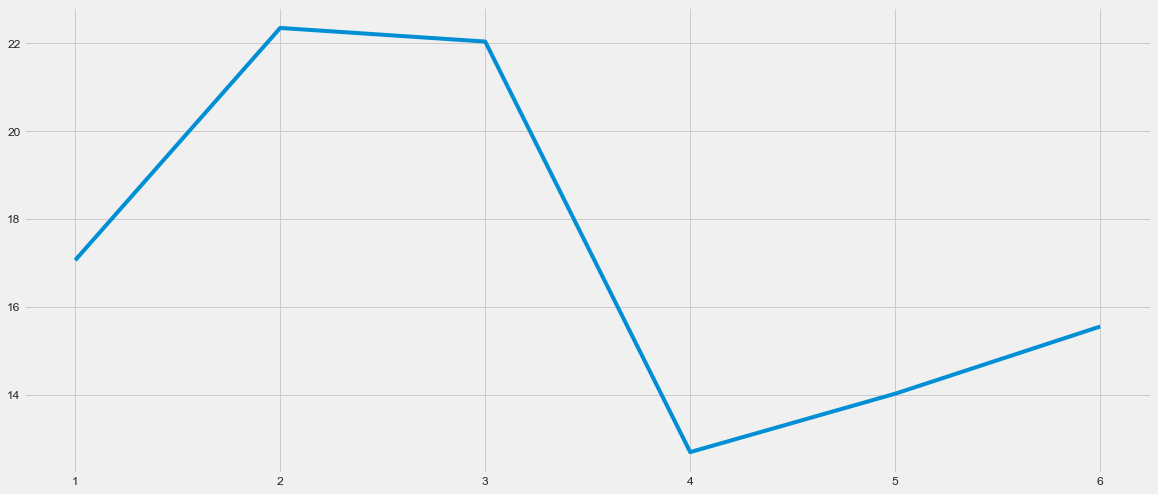

In [34]:
# Forecasting on unknown test set for specified parameters order = (0,1,2),seasonal_order =(0,2,2,7)

cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score (cv_rolling, order = (0,1,2),seasonal_order =(0,2,2,7))
print("Average RMSE score for 6 folds: ",mean(cv_scores_list))
print("Min RMSE score 6 folds: ", min(cv_scores_list))
sns.lineplot(x = [1,2,3,4,5,6], y = cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())

y_forecasted = min_result.forecast(steps=31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

CV[1]
The Mean Squared Error of our forecasts is 578.07
The Root Mean Squared Error of our forecasts is 24.04
CV[2]
The Mean Squared Error of our forecasts is 1145.16
The Root Mean Squared Error of our forecasts is 33.84
CV[3]
The Mean Squared Error of our forecasts is 165.69
The Root Mean Squared Error of our forecasts is 12.87
CV[4]
The Mean Squared Error of our forecasts is 84.36
The Root Mean Squared Error of our forecasts is 9.18
CV[5]
The Mean Squared Error of our forecasts is 260.76
The Root Mean Squared Error of our forecasts is 16.15
CV[6]
The Mean Squared Error of our forecasts is 492.21
The Root Mean Squared Error of our forecasts is 22.19
Average RMSE score for 6 folds:  19.71166666666667
Minimum RMSE score:  9.18
                                     SARIMAX Results                                     
Dep. Variable:                      Door TO Door   No. Observations:                  135
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 7)   Log Likelihood                -44

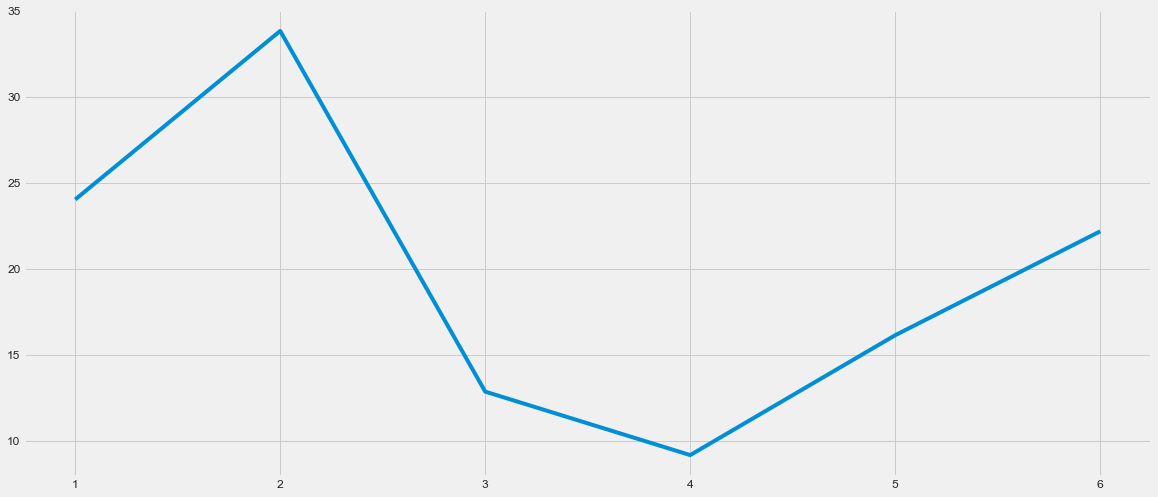

In [35]:
#Unspecified Parameters
cv_rolling = rolling_forecast(train, 120, 5)
cv_scores_list = cross_validation_score (cv_rolling, order = param,seasonal_order = param_seasonal)
print("Average RMSE score for 6 folds: ",mean(cv_scores_list))
print("Minimum RMSE score: " , min(cv_scores_list))
sns.lineplot(x = [1,2,3,4,5,6], y = cv_scores_list)
min_result = result_for_test[min(cv_scores_list)]
last_result = result_for_test[cv_scores_list[-1]]
print(min_result.summary())
print(last_result.summary())


y_forecasted = min_result.forecast(steps =  31)
y_test_truth = daily_resampled.loc[daily_resampled.index >= SPLIT_DATE]
mse = ((y_forecasted - y_test_truth) ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




In [36]:
# Simple Exponential Smoothing
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))

    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))

    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')

    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))

    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 18.94
The Root Mean Squared Error of our forecasts with auto optimization is 18.94


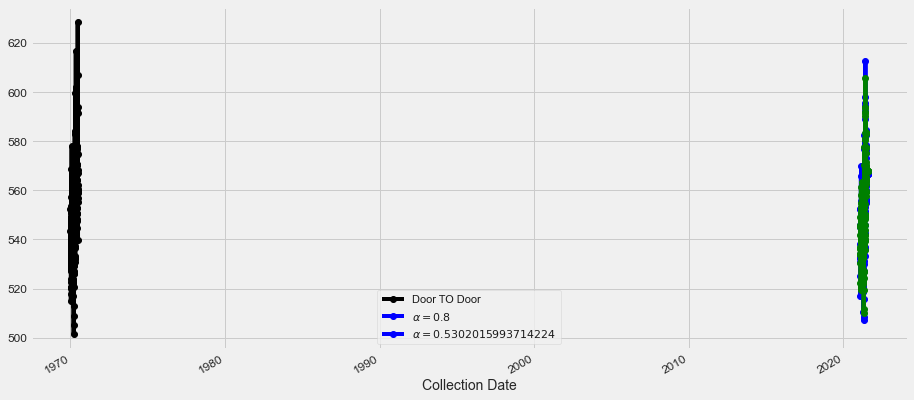

In [37]:
ses(dailycollection["Door TO Door"], dailycollection_train,dailycollection_test,0.8,31)


In [38]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))

    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))

    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

The Root Mean Squared Error of Holts Linear trend 19.7
The Root Mean Squared Error of Holts Exponential trend 20.06


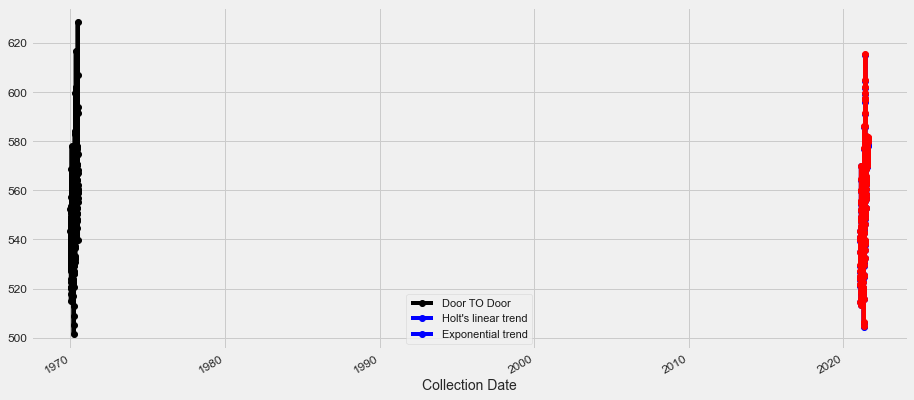

In [39]:
holt(dailycollection['Door TO Door'], dailycollection_train,dailycollection_test,0.6,0.2,31)


In [40]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):

    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))

    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))

        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))

        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)

    elif seasonal_type == 'multiplicative':
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))

        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))

        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)

    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()


The Root Mean Squared Error of additive trend, additive seasonal of period season_length=52 and a Box-Cox transformation 24.31
The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=52 and a Box-Cox transformation 23.97


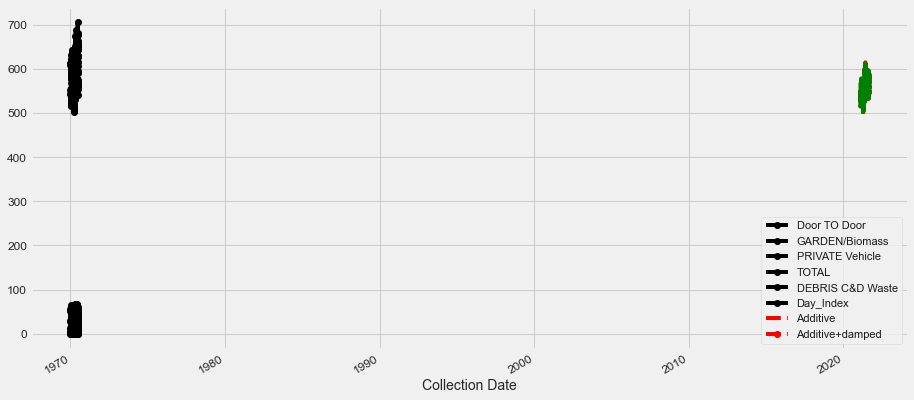

In [41]:
holt_win_sea(dailycollection, dailycollection_train,dailycollection_test,'additive',52, 31)


# Simple Moving Average

In [42]:
dailycollection.info()
# set date column as index
dailycollection.set_index('Collection Date', inplace=True)

dailycollection.index.name = 'Door TO Door'

dailycollection['average_doortodoor'] = dailycollection.mean(axis=1)

# drop columns containing monthly values
# visualize the first 5 columns
dailycollection.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Collection Date   181 non-null    object 
 1   Door TO Door      181 non-null    float64
 2   GARDEN/Biomass    181 non-null    float64
 3   PRIVATE Vehicle   181 non-null    float64
 4   TOTAL             181 non-null    float64
 5   DEBRIS C&D Waste  181 non-null    float64
 6   Day               181 non-null    object 
 7   Day_Index         181 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 11.4+ KB


,Door TO Door,GARDEN/Biomass,PRIVATE Vehicle,TOTAL,DEBRIS C&D Waste,Day,Day_Index,average_doortodoor
Door TO Door,,,,,,,,
2021-02-01,552.300,55.200,6.600,614.100,29.245,Monday,0,209.574167
2021-02-02,543.375,52.270,13.055,608.700,28.920,Tuesday,1,207.886667
2021-02-03,526.965,53.205,10.780,590.950,31.100,Wednesday,2,202.500000
2021-02-04,532.745,53.550,16.580,602.875,34.815,Thursday,3,207.260833
2021-02-05,534.260,58.375,7.675,600.310,28.845,Friday,4,205.577500


Text(0, 0.5, 'Door To Door [Tonnes]')

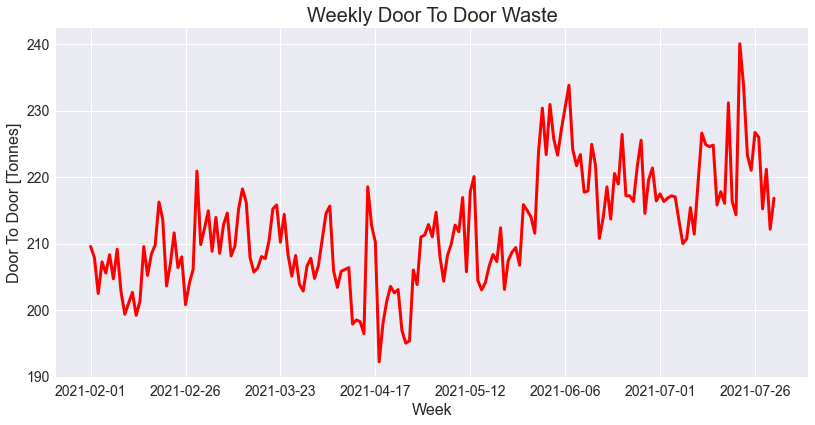

In [43]:

plt.style.use('seaborn')

dailycollection.drop(
    ['TOTAL', 'PRIVATE Vehicle', 'DEBRIS C&D Waste', 'Day', 'Day_Index', 'GARDEN/Biomass', 'Door TO Door'], axis=1,
    inplace=True)
dailycollection.plot(color='red', linewidth=3, figsize=(12, 6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('Weekly Door To Door Waste', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Door To Door [Tonnes]', fontsize=16)

In [44]:
dailycollection['SMA_6'] = dailycollection.average_doortodoor.rolling(6, min_periods=1).mean()

dailycollection['SMA_8'] = dailycollection.average_doortodoor.rolling(8, min_periods=1).mean()

Text(0, 0.5, 'Weight [Tonnes]')

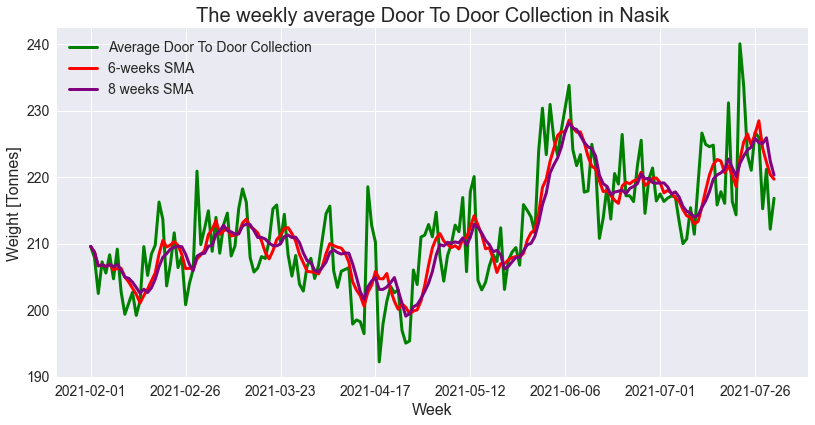

In [45]:
# colors for the line plot
colors = ['green', 'red', 'purple']

# line plot - the yearly average air temperature in Barcelona
dailycollection.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Door To Door Collection', '6-weeks SMA', '8 weeks SMA'], fontsize=14)

# title and labels
plt.title('The weekly average Door To Door Collection in Nasik', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Weight [Tonnes]', fontsize=16)